In [10]:
%pylab inline
import numpy as np
import torch
import os
import pandas as pd
import time
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch import autograd
from torch.autograd import Variable
import nibabel as nib
from torch.utils.data.dataset import Dataset
from torch.utils.data import dataloader

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from nilearn import plotting
import h5py

from ADNI_dataset import *
from BRATS_dataset import *
from ATLAS_dataset import *
from utils import *

import pytorch_ssim
from ipdb import set_trace

Populating the interactive namespace from numpy and matplotlib


/usr/local/miniconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Generator', 'time', 'resize', 'plotting', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
workers = 4
BATCH_SIZE = 1
latent_dim = 1000

Use_BRATS = False
Use_ATLAS = False
gpu = 0
IS_FAKE = False

dir_name = 'fake_samples' if IS_FAKE else 'real_samples'
file_name = 'fake' if IS_FAKE else 'real'

In [17]:
def show_brain(featmask):
    featmask = nib.Nifti1Image(featmask,affine = np.eye(4))
    plotting.plot_img(featmask,cut_coords=(32,32,32),draw_cross=False,annotate=False,black_bg=True)
    plotting.plot_anat(featmask,cut_coords=(32,32,32),draw_cross=False,annotate=False,black_bg=True)
    plotting.show()

In [4]:
from Model_alphaWGAN import *


G = Generator(noise=latent_dim).cuda(gpu)
# E = Encoder(out_class = latent_dim, gpu_ind=gpu).cuda(gpu)
E = Discriminator(out_class = latent_dim, is_dis=False).cuda(gpu)

G.load_state_dict(torch.load('./wl_checkpoint_mse/G_iter200000.pth')) # Alpha-WGAN-GP

In [5]:
trainset = ADNIdataset(augmentation=True)
train_loader = torch.utils.data.DataLoader(trainset,batch_size=BATCH_SIZE,
                                          shuffle=True,num_workers=workers)
#'flair' or 't2' or 't1ce'
# trainset = BRATSdataset(imgtype='flair')
# train_loader = torch.utils.data.DataLoader(trainset,batch_size = BATCH_SIZE, shuffle=True,
#                                                num_workers=workers)

# trainset = ATLASdataset(augmentation=True)
# train_loader = torch.utils.data.DataLoader(trainset,batch_size=BATCH_SIZE,
#                                           shuffle=True,num_workers=workers)

gen_load = inf_train_gen(train_loader)

### generate samples

In [6]:
i = 0
while i < 200:
    if not IS_FAKE:
        image = gen_load.__next__()
    else:
        noise = torch.randn((1, 1000)).cuda(gpu)
        image = G(noise)
    
    featmask = np.squeeze(image.data.cpu().numpy())
#     set_trace()

    f = h5py.File(f'../{dir_name}/{file_name}_{i}', 'w')
    f.create_dataset('dataset_1', data=featmask)
    f.close()
    
    i += 1
    


### test sample generation

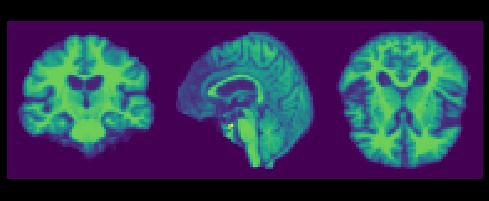

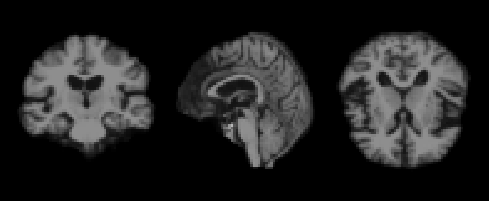

> <ipython-input-18-896580d6a48a>(2)<module>()
      1 i = 0
----> 2 while i < 200:
      3     file = h5py.File(f'../{dir_name}/{file_name}_{i}', 'r')

ipdb> c


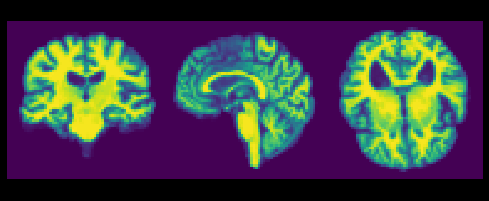

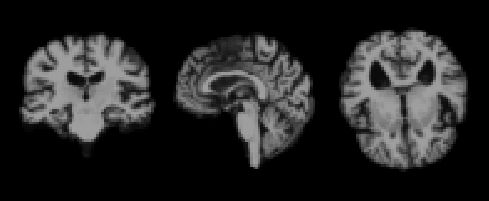

> <ipython-input-18-896580d6a48a>(2)<module>()
      1 i = 0
----> 2 while i < 200:
      3     file = h5py.File(f'../{dir_name}/{file_name}_{i}', 'r')

ipdb> exit


BdbQuit: 

In [18]:
i = 0
while i < 200:
    file = h5py.File(f'../{dir_name}/{file_name}_{i}', 'r')
    featmask = file['dataset_1']
    show_brain(featmask)
    i += 1
    set_trace()